# Red Neuronal para Clasificación no Lineal

## Sección 2 - Proyecto (2) - Alejandro Molina (T3)

### Líbrerias a utilizar:

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

Cree los datos de entrada y salida para una compuerta XOR:

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

Para una red neuronal con dos neuronas en la capa de entrada, tres en la capa escondidad y una en la salida, inicialize los pesos y sesgos:

In [3]:
# w1 sera la matriz de pesos de la capa 1
w1 = 2 * np.random.random(size=(2,3)) - 1

# w2 sera la matriz de pesos de la capa 2
w2 = 2 * np.random.random(size=(3,1)) - 1

# b1 sera el bias de la capa 1
b1 = 2 * np.random.random(size=(1,3)) - 1

# b2 sera el bias de la capa 2
b2 = 2 * np.random.random(size=(1,1)) - 1

# Es el factor de aprendizaje
eta = 2.8

Defina la función de activación y su derivada:

In [4]:
# Definicion de la función sigmoide (Función de activación)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Definicion de la derivada de la función sigmoide (Función de activación derivada)
def dsigmoid(y):
    return y * (1 - y)

## Forward pass

Para el forward los calculos se hicieron usando estas matrices:

Neth = $\begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \\ w_{31} & w_{33} \end{bmatrix}$ * $\begin{bmatrix} i_{1} \\ i_{2} \end{bmatrix}$

Outh = $\begin{bmatrix} \sigma(neth_{1}) \\ \sigma(neth_{2}) \\ \sigma(neth_{3}) \end{bmatrix}$

Neto = $\begin{bmatrix} w_{11} & w_{21} & w_{31} \end{bmatrix}$ * $\begin{bmatrix} outh_{1} \\ outh_{2} \\ outh_{3} \end{bmatrix}$

Outo = $\sigma(neto)$





In [5]:
# Definimos la función del Forward pass
def forward_pass():
    # Capa de entrada
    Neth = np.dot(X, w1) + b1
    Outh = sigmoid(Neth)
    # Capa de salida
    Neto = np.dot(Outh, w2) + b2
    Outo = sigmoid(Neto)
    return Neth, Outh, Neto, Outo

# Probamos la función del Forward pass
Neth, Outh, Neto, Outo = forward_pass()

# Mostramos el resultado sin redondear
print('Resultado de la capa salida:',Outo.T) 

# Mostramos el resultado redondeado
print('Resultado redondeado de C.S:', np.round(Outo.T)) #c.s = capa salida

Resultado de la capa salida: [[0.60247371 0.54370587 0.58575255 0.52600453]]
Resultado redondeado de C.S: [[1. 1. 1. 1.]]


## Backward pass

Implemente las derivadas del error respecto a los parámetros w y b:

Las derivadas son las siguientes:

Calculamos delta1 ($\delta_1$) y delta2 ($\delta_2$):

- $\delta_2 = \frac{\partial E}{\partial Outo} * \frac{\partial Outo}{\partial Neto} = - (Y - Outo) * Outo * (1 - Outo)$
- $\delta_1 = \frac{\partial E}{\partial Outh} * \frac{\partial Outh}{\partial Neth} = \delta_2 * w_2 * Outh * (1 - Outh)$

Derivada respecto a w:

- $\frac{\partial E}{\partial w_2} = \delta_2 * Outh$
- $\frac{\partial E}{\partial w_1} = \delta_1 * X$

Derivada respecto a b:

- $\frac{\partial E}{\partial b_2} = \delta_2$
- $\frac{\partial E}{\partial b_1} = \delta_1$

In [6]:
# Implementamos la retropropagación
def backward_pass(Outh, Outo):
    # Indicamos que vamos a utilizar las variables globales
    global w2, y

    # Calculamos el error de la capa de salida
    delta2 = - (y - Outo) * dsigmoid(Outo)
    
    # Calculamos el error de la capa escondida
    delta1 = np.dot(delta2, w2.T) * dsigmoid(Outh)

    return delta1, delta2

Implemente la correción de los parámetros:

In [7]:
# Implementamos la actualización de los pesos y bias
def update_weightsAndBias(Outh,delta1, delta2):
    # Indicamos que usaremos las variables globales
    global w1, w2, b1, b2, eta, X

    # Actualizamos los pesos y bias de la segunda capa
    w2 -= eta * np.dot(Outh.T, delta2)
    b2 -= eta * np.sum(delta2, keepdims=True)

    # Actualizamos los pesos y bias de la primera capa
    w1 -= eta * np.dot(X.T, delta1)
    b1 -= eta * np.sum(delta1, axis=0, keepdims=True)

    # Nota:
    # np.sum(axis=0) suma los elementos de cada columna
    # np.sum(keepdims=True) mantiene las dimensiones del array


## Entrenamiento de la red neuronal

Use el esquema de "Retropropagación" para entrenar la red.

In [8]:
# Definimos la cantidad de epocas
epochs = 400

# Creamos una lista para guardar el error
errores = []

# Implementación de la retropropagación
for epoch in range(epochs):
    # Forward pass
    Neth, Outh, Neto, Outo = forward_pass()

    # Calculamos el error
    E = 0.5 * np.sum((y - Outo) ** 2)
    errores.append(E)
    
    # Backward pass
    delta1, delta2 = backward_pass(Outh, Outo)

    # Actualizamos los pesos y sesgos
    update_weightsAndBias(Outh,delta1, delta2)

# Imprimimos los resultados
print("Valores esperados: ", y.T)
print("Resultados:        ", (Outo.T))
print('Resultados redondeados: ', np.round(Outo.T))
print("Error final:       ", E)

Valores esperados:  [[0 1 1 0]]
Resultados:         [[0.05255416 0.95099807 0.94655049 0.04151886]]
Resultados redondeados:  [[0. 1. 1. 0.]]
Error final:        0.004871897275157643


Valide del entrenamiento. Con una gráfica del error en funcion de las épocas.

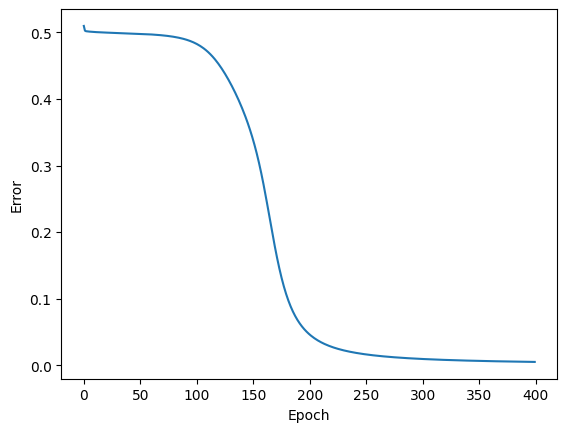

In [9]:
# Gráfica Error vs. Épocas
plt.plot(errores)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()